<a href="https://colab.research.google.com/github/SiweiLuo/reinforcement-learning/blob/master/Blackj_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

defaultdict(<class 'float'>, {})
defaultdict(<class 'int'>, {})
observation =  (14, 9, False)
states = [(14, 9, False)]
action = 1
actions = [1]
(15, 9, False) 0 False {}
reward =  0
rewards =  [0]
observation =  (15, 9, False)
states = [(14, 9, False), (15, 9, False)]
action = 1
actions = [1, 1]
(25, 9, False) -1 True {}
reward =  -1
rewards =  [0, -1]
[(14, 9, False), (15, 9, False)] [1, 1] [0, -1]
observation =  (6, 7, False)
states = [(6, 7, False)]
action = 1
actions = [1]
(16, 7, False) 0 False {}
reward =  0
rewards =  [0]
observation =  (16, 7, False)
states = [(6, 7, False), (16, 7, False)]
action = 1
actions = [1, 1]
(23, 7, False) -1 True {}
reward =  -1
rewards =  [0, -1]
[(6, 7, False), (16, 7, False)] [1, 1] [0, -1]
observation =  (20, 2, False)
states = [(20, 2, False)]
action = 0
actions = [0]
(20, 2, False) 1.0 True {}
reward =  1.0
rewards =  [1.0]
[(20, 2, False)] [0] [1.0]
observation =  (21, 5, True)
states = [(21, 5, True)]
action = 0
actions = [0]
(21, 5, True) 0

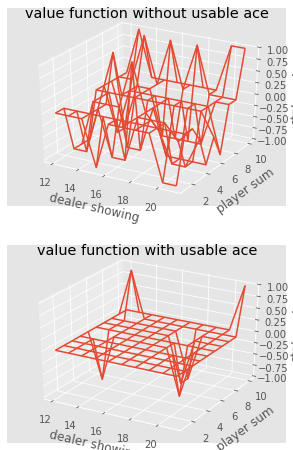

In [5]:

import numpy
import gym
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial


plt.style.use('ggplot')


env = gym.make('Blackjack-v0')
env.action_space, env.observation_space

def sample_policy(observation):
  score, dealer_score, usable_ace = observation
  return 0 if score >= 20 else 1

def generate_episode(policy,env):
  states, actions, rewards = [],[],[]
  observation = env.reset()
  while True:
    print('observation = ',observation)
    states.append(observation)
    print('states =',states)
    action = sample_policy(observation)
    print('action =',action)
    actions.append(action)
    print('actions =',actions)
    observation,reward,done, info = env.step(action)
    print(observation,reward,done, info)
    print('reward = ',reward)
    rewards.append(reward)
    print('rewards = ',rewards)
    if done:
      break
  print(states,actions,rewards)
  return states,actions,rewards


          
          
          
def first_visit_mc_prediction(policy,env,n_episodes):
  value_table = defaultdict(float)
  print(value_table)
  N = defaultdict(int)
  print(N)
  for _ in range(n_episodes):
    states,_,rewards = generate_episode(policy,env)
    returns = 0

    for t in range(len(states) -1,-1,-1):
      R = rewards[t]
      S = states[t]
      returns += R
      if S not in states[:t]:
        N[S] += 1
        value_table[S] += (returns-value_table[S])/N[S]
  print('value_table = ',value_table)
  return value_table
          
          
          

value = first_visit_mc_prediction(sample_policy,env,n_episodes=50)
#print(value)
          

def plot_blackjack(V,ax1,ax2):
  player_sum = numpy.arange(12,21+1)
  dealer_show = numpy.arange(1,10+1)
  usable_ace = numpy.array([False,True])
  state_values = numpy.zeros((len(player_sum),len(dealer_show),len(usable_ace)))

  for i, player in enumerate(player_sum):
    for j, dealer in enumerate(dealer_show):
      for k, ace in enumerate(usable_ace):
        state_values[i,j,k] = V[player,dealer,ace]

  x,y = numpy.meshgrid(player_sum,dealer_show)

  ax1.plot_wireframe(x,y,state_values[:,:,0])
  ax2.plot_wireframe(x,y,state_values[:,:,1])
  for ax in ax1,ax2:
    ax.set_zlim(-1,1)
    ax.set_ylabel('player sum')
    ax.set_xlabel('dealer showing')
    ax.set_zlabel('state-value')



fig,axes = pyplot.subplots(nrows=2,figsize=(5,8),subplot_kw={'projection':'3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value,axes[0],axes[1])

